# T3.1 / N2 e Presença em aula 24 
Atividade de Presença para Probest.

Para nossa análise, X são os casos e Y são as mortes.

Primeiramente iremos pegar os dados das 20 primeiras semanas epidemiológica.

In [33]:
import numpy as np

In [3]:
import pandas as pd
dados = pd.read_csv('./Dados semana 1 a 20 - Covid 2021 - Página1.csv')

Amostragem dos 5 primeiros dados:

In [4]:
dados.head()

,Semana,Casos,Obitos
0,1,359593,6906
1,2,379061,6665
2,3,361195,7149
3,4,360721,7500
4,5,320820,7067


## 2: Encontre a reta de regressão linear Y em função de X (para as semanas ímpares das 20 semanas), se ela existir.
Vamos primeiramente pegar os dados das semanas ímpares.

In [5]:
impares = dados.loc[dados.Semana % 2 != 0]
# 5 primeiros dados.
impares.head()

,Semana,Casos,Obitos
0,1,359593,6906
2,3,361195,7149
4,5,320820,7067
6,7,329394,7445
8,9,421604,10104


Temos que encontrar a fórmula da regressão: Ya = a + b*X

Onde: <br>
a = (média de Y)  - b * (média de X) <br>
b = Covariância(X,Y) / (desvio padrão(X))²

### Vamos descobrir B:
B = Covariância(X,Y) / (desvio padrão(X))²

Como todos os dados são diferentes, a esperança de X e Y é igual à média aritimética.

#### Covâriancia (X, Y):
Cov(X,Y) = E(X*Y) - [E(X) * E(Y)]

In [6]:
# E (X), onde X são os casos.
E_X = impares.Casos.sum() / len(impares.Casos)
print('Esperança/Média de  X (Casos)', E_X)

Esperança/Média de  X (Casos) 408086.5


In [7]:
# E(Y), onde Y são os Obitos
E_Y = impares.Obitos.sum() / len(impares.Obitos)
print('Esperança/Média de  Y (Óbitos)', E_Y)

Esperança/Média de  Y (Óbitos) 12466.3


In [8]:
# E(X*Y)
X_Y = impares.Casos * impares.Obitos
print("Valores de X*Y:", X_Y.values)
E_X_Y = X_Y.sum() / len(X_Y)
print('\nEsperança/Média de E*Y:', E_X_Y)

Valores de X*Y: [2483349258 2582183055 2267234940 2452338330 4259886816 8010977364
 9099325105 9258249240 7078943200 5904336345]

Esperança/Média de E*Y: 5339682365.3


Então temos:

In [9]:
cov_X_Y = E_X_Y - (E_X * E_Y)
print('Covâriancia de X e Y:', E_X_Y)

Covâriancia de X e Y: 5339682365.3


#### (Desvio Padrão(X))²
Desvio Padrão(X) = Raiz de Variância (X) = raiz de E(X²) - E(X)²
<br>Logo, (Desvio Padrão(X))² = (Raiz de Variância (X))² = Variância(X) = E(X²) - E(X)² 

In [10]:
# Calcular E(X²), onde X são os casos.
x_ao_quadrado = impares.Casos**2 
print('Valores de X²:', x_ao_quadrado.values)
E_X_2 = x_ao_quadrado.sum() / len(x_ao_quadrado) 
print('\n E(X²) = ', E_X_2)

Valores de X²: [129307125649 130461828025 102925472400 108500407236 177749932816
 261656802576 214586665225 207102357225 174523417600 194176829025]

 E(X²) =  170099083777.7


In [11]:
from math import sqrt
# Variância = E(x²) - E(x)²
var_X = E_X_2 - (E_X**2)
print('Variância de X:', var_X)
dp_X = sqrt(var_X)
print('Desvio padrão de X:', dp_X)

Variância de X: 3564492295.450012
Desvio padrão de X: 59703.36921355454


Agora podemos calcular: B = Covariância(X,Y) / (desvio padrão(X))²

In [12]:
B = cov_X_Y / (dp_X**2)
print('Temos B:', B)

Temos B: 0.07079651446353907


Agora calculamos A: a = (média de Y) - b * (média de X)

In [13]:
A = E_Y - (B * E_X)
print('Valor de A:', A)

Valor de A: -16424.80179962504


Por fim, a fórmula da reta: Ya = a + b*X
<br> Temos: <b>Y = -16424.80 + 0.070 * X</b>

In [14]:
# Definição da nossa formula Y = A + B*X
def previsao(X, a = A, b = B):
    Y = a + b * X
    return Y

In [15]:
# Prever usando a regressão linear.
previsao(X=450_000)

15433.629708967546

## 3.1 Plote em um gráfico;
#### Vamos agora plotar os dados em um Gráfico de dispersão e a Reta de Regressão

Text(0.5, 0, 'Casos')

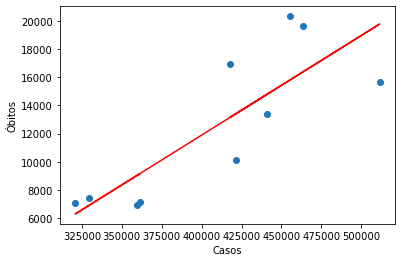

In [16]:
import matplotlib.pyplot as plt
plt.scatter(impares.Casos, impares.Obitos)
plt.plot(impares.Casos,[previsao(i) for i in impares.Casos], color='red')
plt.ylabel('Óbitos')
plt.xlabel('Casos')

## 3.2 Determine os coeficientes de determinação e correlação linear entre as variáveis X e Y;

### Coeficiente de Determinação
Agora vamos calcular o Coeficiente de Determinação

R² = Soma(Yia - E(Y))² / Soma(Yi - E(Y))²

In [62]:
previsoes = [previsao(i) for i in impares.Casos]
previsoes_soma_2 = [(p - E_Y)**2 for p in previsoes]

real = impares.Obitos.values
real_soma_2 = [(r - E_Y)**2 for r in real]

In [67]:
R_2 = sum(previsoes_soma_2) / sum(real_soma_2)
print('Coeficiente de Determinação:', R_2)

Coeficiente de Determinação: 0.6771566077941553


Sabemos que R² = P² <br>
Então:

In [68]:
# p = raiz quadrada de R²
p = sqrt(R_2)
print('Coeficiente de Correlação linear:', p)

Coeficiente de Correlação linear: 0.8228952593095644
